In [1]:
import pandas as pd

pd.set_option("display.max_rows", None)  # 顯示所有列

In [2]:
dir_path = "/home/S113062628/project/echo-embeddings/mteb_results/echo_mistral/no_model_name_available/no_revision_available/"

import os
import json
import pandas as pd

main_score = 0.0
count = 0

data = []

for json_log in os.listdir(dir_path):
    if json_log.endswith(".json") and json_log != "model_meta.json":
        with open(os.path.join(dir_path, json_log), "r") as f:
            log_data = json.load(f)
            main_score += log_data["scores"]["test"][0]["main_score"]
            data.append(
                {
                    "file": json_log,
                    "main_score": log_data["scores"]["test"][0]["main_score"],
                }
            )
            count += 1

average_main_score = main_score / count if count > 0 else 0
print(f"Average main_score across {count} files: {average_main_score}")

data.append(
    {
        "file": "Average",
        "main_score": average_main_score,
    }
)

df_1 = pd.DataFrame(data)

df_1

Average main_score across 30 files: 0.5245013000000001


,file,main_score
0,TwentyNewsgroupsClustering.json,0.261433
1,BiorxivClusteringP2P.json,0.322924
2,SummEval.json,0.294519
3,STS13.json,0.793560
4,BiorxivClusteringS2S.json,0.236268
5,MedrxivClusteringP2P.json,0.287018
6,MindSmallReranking.json,0.286000
7,ArguAna.json,0.330960
8,RedditClusteringP2P.json,0.498390
9,STS14.json,0.687802


In [3]:
dir_path = "/home/S113062628/project/echo-embeddings/mteb_results/echo_mistral_compute_matched/no_model_name_available/no_revision_available/"

import os
import json
import pandas as pd

main_score = 0.0
count = 0

data = []

for json_log in os.listdir(dir_path):
    if json_log.endswith(".json") and json_log != "model_meta.json":
        with open(os.path.join(dir_path, json_log), "r") as f:
            log_data = json.load(f)
            main_score += log_data["scores"]["test"][0]["main_score"]
            data.append(
                {
                    "file": json_log,
                    "main_score": log_data["scores"]["test"][0]["main_score"],
                }
            )
            count += 1

average_main_score = main_score / count if count > 0 else 0
print(f"Average main_score across {count} files: {average_main_score}")

data.append(
    {
        "file": "Average",
        "main_score": average_main_score,
    }
)

df_2 = pd.DataFrame(data)

df_2

Average main_score across 30 files: 0.5248924333333334


,file,main_score
0,TwentyNewsgroupsClustering.json,0.261433
1,BiorxivClusteringP2P.json,0.305831
2,SummEval.json,0.293632
3,STS13.json,0.793560
4,BiorxivClusteringS2S.json,0.236268
5,MedrxivClusteringP2P.json,0.276604
6,MindSmallReranking.json,0.286000
7,ArguAna.json,0.371110
8,RedditClusteringP2P.json,0.511228
9,STS14.json,0.687802


In [4]:
df = df_1.merge(df_2, on="file", suffixes=("", "_CM"))
df["diff"] = df["main_score"] - df["main_score_CM"]
df = df.sort_values(by="diff", ascending=False)
df

,file,main_score,main_score_CM,diff
1,BiorxivClusteringP2P.json,0.322924,0.305831,0.017093
5,MedrxivClusteringP2P.json,0.287018,0.276604,0.010414
19,StackExchangeClusteringP2P.json,0.300046,0.291737,0.008309
10,STS22.json,0.584072,0.576249,0.007823
2,SummEval.json,0.294519,0.293632,0.000887
12,RedditClustering.json,0.297467,0.297383,0.000084
26,SprintDuplicateQuestions.json,0.727033,0.727028,0.000005
25,TwitterURLCorpus.json,0.773246,0.773245,0.000001
6,MindSmallReranking.json,0.286000,0.286000,0.000000
11,STS17.json,0.831399,0.831399,0.000000


In [5]:
df_filtered = df[abs(df["diff"]) > 0.005]
df_filtered

,file,main_score,main_score_CM,diff
1,BiorxivClusteringP2P.json,0.322924,0.305831,0.017093
5,MedrxivClusteringP2P.json,0.287018,0.276604,0.010414
19,StackExchangeClusteringP2P.json,0.300046,0.291737,0.008309
10,STS22.json,0.584072,0.576249,0.007823
8,RedditClusteringP2P.json,0.498390,0.511228,-0.012838
7,ArguAna.json,0.330960,0.371110,-0.040150


In [6]:
import csv
import pandas as pd

df_len = pd.read_csv(
    "/home/S113062628/project/echo-embeddings/len_summary_from_probe.csv"
)

df_len

,dataset,kind,n,mean,median,p90,p95,p99,>128(%),>256(%),>512(%)
0,BiorxivClusteringS2S,raw,75000,21.382187,20.0,31.0,35.00,44.00,0.000000,0.000000,0.000000
1,BiorxivClusteringS2S,trunc,75000,23.382187,22.0,33.0,37.00,46.00,0.000000,0.000000,0.000000
2,BIOSSES,raw,200,37.305000,34.5,59.0,70.00,81.05,0.000000,0.000000,0.000000
3,BIOSSES,trunc,200,39.305000,36.5,61.0,72.00,83.05,0.000000,0.000000,0.000000
4,STS14,raw,7500,11.426267,10.0,18.0,23.00,32.01,0.000000,0.000000,0.000000
5,STS14,trunc,7500,13.426267,12.0,20.0,25.00,34.01,0.000000,0.000000,0.000000
6,SprintDuplicateQuestions,raw,8931,13.079610,12.0,19.0,21.00,30.00,0.000000,0.000000,0.000000
7,SprintDuplicateQuestions,trunc,8931,15.079610,14.0,21.0,23.00,32.00,0.000000,0.000000,0.000000
8,StackExchangeClusteringP2P,raw,75000,280.260760,202.0,600.1,788.00,1117.00,71.774667,38.849333,13.782667
9,StackExchangeClusteringP2P,trunc,75000,247.916933,204.0,512.0,512.00,512.00,72.514667,39.260000,0.000000


In [7]:
df["file"] = df["file"].str.replace(".json", "", regex=False)
df = df.merge(df_len, left_on="file", right_on="dataset", how="outer")
df = df.drop(columns=["dataset"])
df

,file,main_score,main_score_CM,diff,kind,n,mean,median,p90,p95,p99,>128(%),>256(%),>512(%)
0,ArguAna,0.330960,0.371110,-0.040150,raw,10080.0,211.623810,190.0,346.0,413.00,624.21,77.212302,26.706349,2.192460
1,ArguAna,0.330960,0.371110,-0.040150,trunc,10080.0,210.344246,192.0,348.0,415.00,512.00,78.154762,27.202381,0.000000
2,ArxivClusteringP2P,0.403233,0.406567,-0.003334,raw,732723.0,214.467802,201.0,349.0,394.00,488.00,80.427802,29.823139,0.667101
3,ArxivClusteringP2P,0.403233,0.406567,-0.003334,trunc,732723.0,216.007296,203.0,351.0,396.00,490.00,81.197806,30.436877,0.000000
4,ArxivClusteringS2S,0.320111,0.320137,-0.000026,raw,732723.0,15.189333,14.0,24.0,27.00,38.00,0.000409,0.000000,0.000000
5,ArxivClusteringS2S,0.320111,0.320137,-0.000026,trunc,732723.0,17.189333,16.0,26.0,29.00,40.00,0.000409,0.000000,0.000000
6,AskUbuntuDupQuestions,0.544499,0.544499,0.000000,raw,7104.0,13.366976,13.0,21.0,24.00,31.00,0.000000,0.000000,0.000000
7,AskUbuntuDupQuestions,0.544499,0.544499,0.000000,trunc,7104.0,15.366976,15.0,23.0,26.00,33.00,0.000000,0.000000,0.000000
8,Average,0.524501,0.524892,-0.000391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BIOSSES,0.779090,0.779090,0.000000,raw,200.0,37.305000,34.5,59.0,70.00,81.05,0.000000,0.000000,0.000000


In [ ]:
df_filtered = df[["file", "diff", ">256(%)", "mean"]]
df_filtered = df_filtered[df_filtered["file"] != "Average"]

df_filtered = df_filtered[df_filtered[">256(%)"] > 0.0]

cols_to_scale = ["diff", ">256(%)"]

df_filtered[cols_to_scale] = (
    df_filtered[cols_to_scale] - df_filtered[cols_to_scale].mean()
) / df_filtered[cols_to_scale].std()


df_filtered

,file,diff,>256(%)
0,ArguAna,-2.202815,-0.602515
1,ArguAna,-2.202815,-0.587071
2,ArxivClusteringP2P,-0.099882,-0.505475
3,ArxivClusteringP2P,-0.099882,-0.486367
11,BiorxivClusteringP2P,1.066911,1.008100
12,BiorxivClusteringP2P,1.066911,1.032011
15,MedrxivClusteringP2P,0.685405,1.254685
16,MedrxivClusteringP2P,0.685405,1.264814
23,RedditClusteringP2P,-0.642751,-0.788859
24,RedditClusteringP2P,-0.642751,-0.782455


In [9]:
df_filtered[">256(%)"].corr(df_filtered["diff"])

np.float64(0.5645005103010057)

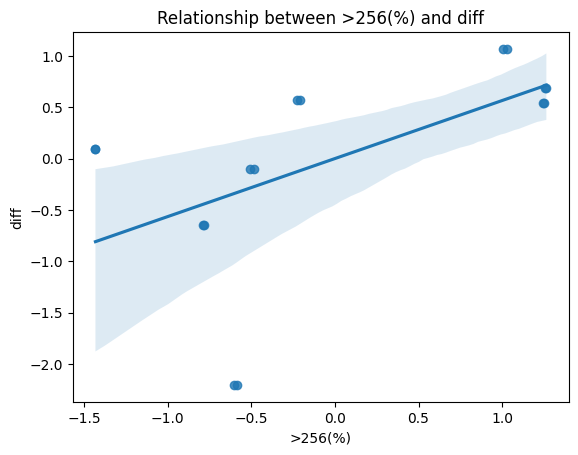

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=">256(%)", y="diff", data=df_filtered)
plt.title("Relationship between >256(%) and diff")
plt.show()